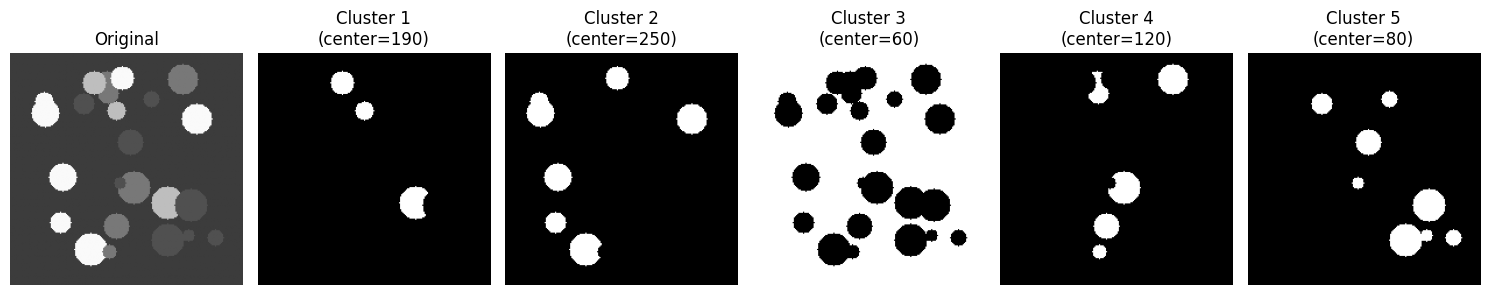

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
# --- 模擬画像生成（明暗＋背景つき）---

img = Image.open("kmeans1.png").convert("L")
img = np.array(img).astype(np.uint8)
# --- k-meansの準備 ---
Z = img.reshape((-1, 1)).astype(np.float32)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 5  # クラスタ数を5に設定

# --- k-meansの実行 ---
_, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)  # クラスタ中心の明るさ値 (0〜255)
label_2d = label.reshape(img.shape)

# --- 各クラスタを中心の明るさで塗る ---
cluster_imgs = []
for i in range(K):
    mask = (label_2d == i)
    cluster_img = np.zeros_like(img)
    cluster_img[mask] = 255   # 最大輝度で塗りつぶす
    cluster_imgs.append(cluster_img)

# --- 表示 ---
fig, axes = plt.subplots(1, K+1, figsize=(15, 3))
axes[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[0].set_title("Original")
axes[0].axis('off')

for i in range(K):
    axes[i+1].imshow(cluster_imgs[i], cmap='gray', vmin=0, vmax=255)
    axes[i+1].set_title(f"Cluster {i+1}\n(center={center[i][0]})")
    axes[i+1].axis('off')

plt.tight_layout()
plt.show()

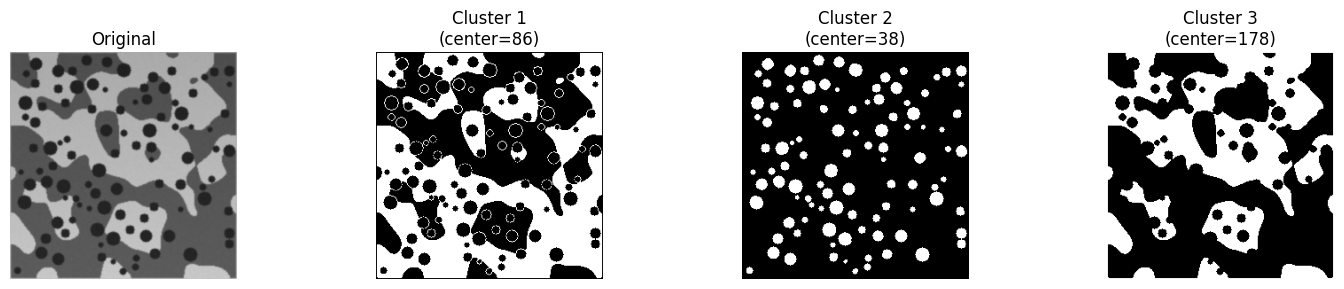

In [9]:

img = Image.open("kmeans2.png").convert("L")
img = np.array(img).astype(np.uint8)

# --- k-meansの準備 ---
Z = img.reshape((-1, 1)).astype(np.float32)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3  # クラスタ数を5に設定

# --- k-meansの実行 ---
_, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)  # クラスタ中心の明るさ値 (0〜255)
label_2d = label.reshape(img.shape)

# --- 各クラスタを中心の明るさで塗る ---
cluster_imgs = []
for i in range(K):
    mask = (label_2d == i)
    cluster_img = np.zeros_like(img)
    cluster_img[mask] = 255   # 最大輝度で塗りつぶす
    cluster_imgs.append(cluster_img)

# --- 表示 ---
fig, axes = plt.subplots(1, K+1, figsize=(15, 3))
axes[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[0].set_title("Original")
axes[0].axis('off')

for i in range(K):
    axes[i+1].imshow(cluster_imgs[i], cmap='gray', vmin=0, vmax=255)
    axes[i+1].set_title(f"Cluster {i+1}\n(center={center[i][0]})")
    axes[i+1].axis('off')

plt.tight_layout()
plt.show()